In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━

In [2]:
!pip uninstall -y numpy scipy scikit-learn
!pip install --upgrade --force-reinstall numpy==1.26.4
!pip install --upgrade --force-reinstall scipy==1.11.4
!pip install --upgrade --force-reinstall scikit-learn==1.3.2

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.3.235 requires scipy>=1.4.1, which is not installed.
gensim 4.4.0 requires scipy>=1.7.0, which is not installed.
libpysal 4.9.2 requires scipy>=1.8, which is not installed.
treelite 4.4.1 requires scipy, which is not installed.
cuml-cu12 25.2.1 requires scipy>=1.8.0, which is not installed.
woodwork 0.31.0 re

In [3]:
!pip uninstall -y scikit-learn
!pip uninstall -y sklearn
!rm -rf /usr/local/lib/python3.11/dist-packages/sklearn

!pip install scikit-learn==1.3.2

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.


In [4]:
import torch
from ultralytics import YOLO
import numpy as np
from sklearn.metrics import accuracy_score

print(f"✓ PyTorch: {torch.__version__}")
print(f"✓ CUDA: {torch.cuda.is_available()}")
print(f"✓ Ultralytics imported successfully")
print(f"✓ NumPy: {np.__version__}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✓ PyTorch: 2.6.0+cu124
✓ CUDA: True
✓ Ultralytics imported successfully
✓ NumPy: 1.26.4


In [5]:
import os

VERI_DIR = "/kaggle/input/veri-vehicle-re-identification-dataset/VeRi"

# Kiểm tra dataset
if os.path.exists(VERI_DIR):
    print(f"✓ Dataset found at: {VERI_DIR}")
    print(f"Contents: {os.listdir(VERI_DIR)}")
else:
    print("✗ Dataset not found. Please add the dataset to your Kaggle notebook.")
    print("Go to 'Add Data' -> Search 'veri-vehicle-re-identification-dataset' -> Add")

✓ Dataset found at: /kaggle/input/veri-vehicle-re-identification-dataset/VeRi
Contents: ['YongtaiPoint_Google.jpg', 'test_track.txt', 'camera_ID.txt', 'list_color.txt', 'list_type.txt', 'image_test', 'train_label.xml', 'ReadMe.txt', 'test_label.xml', 'name_test.txt', 'name_query.txt', 'name_train.txt', 'camera_Dist.txt', 'image_query', 'image_train', 'test_track_VeRi.txt', 'gt_index.txt', 'jk_index.txt']


In [6]:
# Đường dẫn lưu model (trên Kaggle sử dụng /kaggle/working/)
MODEL_SAVE_PATH = "/kaggle/working/yolo11n-reid-triplet.pt"

# Hyperparameters
EPOCHS = 30
BATCH_SIZE = 64
EMBEDDING_DIM = 256
MARGIN = 0.3
LR = 3e-4
IMGSZ = 224
DATA_FRACTION = 1.0

# Device
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {DEVICE}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Device: cuda
CUDA available: True
GPU: Tesla T4


In [7]:
import random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import matplotlib. pyplot as plt
from collections import defaultdict

# Set random seeds
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

In [8]:
class YOLOv11ReIDModel(nn.Module):
    def __init__(self, embedding_dim=256):
        super().__init__()

        from ultralytics import YOLO
        yolo = YOLO("yolo11n-cls.pt")

        # Lấy backbone
        self.backbone = nn.Sequential(*list(yolo.model.model.children())[:-1])

        # Freeze 6 block đầu
        for i, child in enumerate(self.backbone.children()):
            if i < 6:
                for param in child.parameters():
                    param.requires_grad = False

        self.gap = nn.AdaptiveAvgPool2d(1)
        self.flatten = nn.Flatten()
        self._init_embedding_layer(embedding_dim)

    def _init_embedding_layer(self, embedding_dim):
        with torch.no_grad():
            dummy = torch.randn(1, 3, 224, 224)
            for layer in self.backbone:
                dummy = layer(dummy)

            if len(dummy.shape) == 4:
                dummy = self.gap(dummy)

            dummy = self.flatten(dummy)
            feature_dim = dummy.shape[1]

        self.embedding = nn.Sequential(
            nn.Linear(feature_dim, embedding_dim),
            nn.BatchNorm1d(embedding_dim),
        )

        print(f"Feature dim: {feature_dim} -> Embedding dim: {embedding_dim}")

    def forward(self, x):
        for layer in self.backbone:
            x = layer(x)

        if len(x.shape) == 4:
            x = self. gap(x)

        x = self.flatten(x)
        x = self.embedding(x)
        x = nn.functional.normalize(x, p=2, dim=1)

        return x

In [9]:
class VeRiTripletDataset(Dataset):
    def __init__(self, image_dir, transform=None, fraction=1.0):
        self.image_dir = image_dir
        self.transform = transform

        self.samples = []
        self.vehicle_to_images = defaultdict(list)

        all_files = [f for f in os.listdir(image_dir) if f. endswith(".jpg")]

        # Lấy subset dataset
        if fraction < 1.0:
            random.seed(42)
            all_files = random.sample(all_files, int(len(all_files) * fraction))

        for f in all_files:
            parts = f.split('_')
            vid = int(parts[0])
            cid = int(parts[1][1:])

            self.samples.append((f, vid, cid))
            self.vehicle_to_images[vid].append(f)

        # Chỉ giữ Id có ≥2 ảnh
        self.vehicle_to_images = {k: v for k, v in self.vehicle_to_images.items() if len(v) >= 2}
        self.vehicle_ids = list(self.vehicle_to_images.keys())

        self.samples = [(f, vid, cid) for f, vid, cid in self.samples if vid in self.vehicle_ids]

        print(f"Dataset: {len(self.samples)} images, {len(self.vehicle_ids)} vehicles")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        anchor_file, anchor_vid, _ = self.samples[idx]

        pos_candidates = [f for f in self.vehicle_to_images[anchor_vid] if f != anchor_file]
        positive_file = random.choice(pos_candidates) if pos_candidates else anchor_file

        neg_vid = random.choice([v for v in self.vehicle_ids if v != anchor_vid])
        negative_file = random.choice(self.vehicle_to_images[neg_vid])

        anchor = self._load_image(anchor_file)
        positive = self._load_image(positive_file)
        negative = self._load_image(negative_file)

        return anchor, positive, negative, anchor_vid

    def _load_image(self, filename):
        img = Image.open(os.path.join(self.image_dir, filename)).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img

In [10]:
class TripletLoss(nn.Module):
    def __init__(self, margin=0.3):
        super().__init__()
        self. margin = margin

    def forward(self, anchor, positive, negative):
        pos_dist = torch.sum((anchor - positive) ** 2, dim=1)
        neg_dist = torch. sum((anchor - negative) ** 2, dim=1)
        loss = torch.clamp(pos_dist - neg_dist + self.margin, min=0.0)
        return loss.mean()

In [11]:
def train():
    print("=" * 60)
    print("TRAIN YOLOv11n ReID với TRIPLET LOSS (Kaggle)")
    print("=" * 60)

    train_transform = transforms.Compose([
        transforms. Resize((IMGSZ, IMGSZ)),
        transforms. RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    train_dir = os.path.join(VERI_DIR, "image_train")
    dataset = VeRiTripletDataset(train_dir, transform=train_transform, fraction=DATA_FRACTION)

    dataloader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=2,
        pin_memory=True,
        drop_last=True
    )

    print("\nBuilding model...")
    model = YOLOv11ReIDModel(embedding_dim=EMBEDDING_DIM). to(DEVICE)

    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Trainable params: {trainable_params:,} / {total_params:,}")

    criterion = TripletLoss(margin=MARGIN)
    optimizer = torch.optim. Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LR)
    scheduler = torch.optim. lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

    print("\nTraining...")
    best_loss = float('inf')
    history = {'loss': []}

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0

        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{EPOCHS}")
        for anchor, positive, negative, labels in pbar:
            anchor, positive, negative = anchor.to(DEVICE), positive.to(DEVICE), negative. to(DEVICE)

            anchor_emb = model(anchor)
            positive_emb = model(positive)
            negative_emb = model(negative)

            loss = criterion(anchor_emb, positive_emb, negative_emb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix({'loss': f"{loss.item():.4f}"})

        scheduler.step()
        avg_loss = total_loss / len(dataloader)
        history['loss'].append(avg_loss)

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, LR = {scheduler.get_last_lr()[0]:.6f}")

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'loss': avg_loss,
                'embedding_dim': EMBEDDING_DIM,
            }, MODEL_SAVE_PATH)

            print(f"✓ Saved best model (loss: {avg_loss:.4f})")

    # Plot training curve
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], 'b-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Triplet Loss')
    plt.title('Training Loss Curve')
    plt.grid(True, alpha=0.3)
    plt.savefig('/kaggle/working/training_curve.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("\n✓ Training done!")
    print(f"Model saved: {MODEL_SAVE_PATH}")

    return model

In [12]:
def evaluate(model_path=MODEL_SAVE_PATH):
    print("\n" + "=" * 60)
    print("EVALUATE REID MODEL")
    print("=" * 60)

    model = YOLOv11ReIDModel(embedding_dim=EMBEDDING_DIM).to(DEVICE)
    checkpoint = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((IMGSZ, IMGSZ)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    def extract_features(image_dir):
        features, labels, cam_ids = [], [], []
        image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])

        print(f"Extracting {len(image_files)} images...")

        batch_size = 64
        for i in tqdm(range(0, len(image_files), batch_size), desc="Processing"):
            batch_files = image_files[i:i + batch_size]
            batch_images = []

            for f in batch_files:
                parts = f.split('_')
                labels.append(int(parts[0]))
                cam_ids.append(int(parts[1][1:]))

                img = Image.open(os.path.join(image_dir, f)).convert('RGB')
                batch_images.append(transform(img))

            batch_tensor = torch.stack(batch_images). to(DEVICE)

            with torch.no_grad():
                emb = model(batch_tensor)
                features.append(emb.cpu(). numpy())

        return np.vstack(features), np.array(labels), np.array(cam_ids)

    print("\nQuery set:")
    q_feat, q_labels, q_cams = extract_features(os.path.join(VERI_DIR, "image_query"))

    print("\nGallery set:")
    g_feat, g_labels, g_cams = extract_features(os. path.join(VERI_DIR, "image_test"))

    print("\nComputing metrics...")

    dist = 1 - np.dot(q_feat, g_feat.T)

    all_AP, all_cmc = [], np.zeros(50)
    num_valid = 0

    for i in range(len(q_labels)):
        order = np. argsort(dist[i])
        sorted_labels = g_labels[order]
        sorted_cams = g_cams[order]

        keep = ~((sorted_labels == q_labels[i]) & (sorted_cams == q_cams[i]))
        matches = (sorted_labels[keep] == q_labels[i]). astype(float)

        if np.sum(matches) == 0:
            continue

        num_valid += 1

        first_match = np.where(matches == 1)[0]
        if len(first_match) > 0 and first_match[0] < 50:
            all_cmc[first_match[0]:] += 1

        cumsum = np.cumsum(matches)
        precision = cumsum / (np.arange(len(matches)) + 1)
        AP = np.sum(precision * matches) / np.sum(matches)
        all_AP.append(AP)

    mAP = np.mean(all_AP) * 100
    cmc = all_cmc / num_valid * 100

    print("\n" + "=" * 60)
    print("REID METRICS RESULTS")
    print("=" * 60)
    print(f"mAP:      {mAP:.2f}%")
    print(f"Rank-1:   {cmc[0]:.2f}%")
    print(f"Rank-5:   {cmc[4]:.2f}%")
    print(f"Rank-10:  {cmc[9]:.2f}%")
    print(f"Rank-20:  {cmc[19]:.2f}%")
    print("=" * 60)

    # Plot CMC curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 51), cmc, 'b-', linewidth=2)
    plt.xlabel('Rank')
    plt.ylabel('Matching Rate (%)')
    plt.title('CMC Curve - YOLOv11n ReID (Triplet Loss)')
    plt.grid(True, alpha=0.3)
    plt.xlim([1, 50])
    plt.ylim([0, 100])
    plt.scatter([1, 5, 10], [cmc[0], cmc[4], cmc[9]], s=100, c='red', zorder=5)
    plt.legend([f'Rank-1: {cmc[0]:.1f}%', f'Rank-5: {cmc[4]:.1f}%', f'Rank-10: {cmc[9]:.1f}%'], loc='lower right')
    plt.savefig('/kaggle/working/cmc_curve_triplet.png', dpi=150, bbox_inches='tight')
    plt.show()

    return {
        'mAP': mAP,
        'Rank-1': cmc[0],
        'Rank-5': cmc[4],
        'Rank-10': cmc[9]
    }

TRAIN YOLOv11n ReID với TRIPLET LOSS (Kaggle)
Dataset: 37778 images, 576 vehicles

Building model...
Feature dim: 256 -> Embedding dim: 256
Trainable params: 66,304 / 1,267,168

Training...


Epoch 1/30: 100%|██████████| 590/590 [06:40<00:00,  1.47it/s, loss=0.0867]


Epoch 1: Loss = 0.0814, LR = 0.000299
✓ Saved best model (loss: 0.0814)


Epoch 2/30: 100%|██████████| 590/590 [04:33<00:00,  2.16it/s, loss=0.0545]


Epoch 2: Loss = 0.0578, LR = 0.000297
✓ Saved best model (loss: 0.0578)


Epoch 3/30: 100%|██████████| 590/590 [04:33<00:00,  2.16it/s, loss=0.0677]


Epoch 3: Loss = 0.0520, LR = 0.000293
✓ Saved best model (loss: 0.0520)


Epoch 4/30: 100%|██████████| 590/590 [04:33<00:00,  2.16it/s, loss=0.0249]


Epoch 4: Loss = 0.0479, LR = 0.000287
✓ Saved best model (loss: 0.0479)


Epoch 5/30: 100%|██████████| 590/590 [04:37<00:00,  2.13it/s, loss=0.0403]


Epoch 5: Loss = 0.0460, LR = 0.000280
✓ Saved best model (loss: 0.0460)


Epoch 6/30: 100%|██████████| 590/590 [04:39<00:00,  2.11it/s, loss=0.0491]


Epoch 6: Loss = 0.0435, LR = 0.000271
✓ Saved best model (loss: 0.0435)


Epoch 7/30: 100%|██████████| 590/590 [04:41<00:00,  2.09it/s, loss=0.0561]


Epoch 7: Loss = 0.0427, LR = 0.000261
✓ Saved best model (loss: 0.0427)


Epoch 8/30: 100%|██████████| 590/590 [04:41<00:00,  2.09it/s, loss=0.0437]


Epoch 8: Loss = 0.0414, LR = 0.000250
✓ Saved best model (loss: 0.0414)


Epoch 9/30: 100%|██████████| 590/590 [04:38<00:00,  2.12it/s, loss=0.0539]


Epoch 9: Loss = 0.0416, LR = 0.000238


Epoch 10/30: 100%|██████████| 590/590 [04:36<00:00,  2.13it/s, loss=0.0560]


Epoch 10: Loss = 0.0413, LR = 0.000225
✓ Saved best model (loss: 0.0413)


Epoch 11/30: 100%|██████████| 590/590 [04:34<00:00,  2.15it/s, loss=0.0298]


Epoch 11: Loss = 0.0397, LR = 0.000211
✓ Saved best model (loss: 0.0397)


Epoch 12/30: 100%|██████████| 590/590 [04:41<00:00,  2.10it/s, loss=0.0160]


Epoch 12: Loss = 0.0404, LR = 0.000196


Epoch 13/30: 100%|██████████| 590/590 [04:36<00:00,  2.14it/s, loss=0.0263]


Epoch 13: Loss = 0.0396, LR = 0.000181
✓ Saved best model (loss: 0.0396)


Epoch 14/30: 100%|██████████| 590/590 [04:38<00:00,  2.12it/s, loss=0.0449]


Epoch 14: Loss = 0.0387, LR = 0.000166
✓ Saved best model (loss: 0.0387)


Epoch 15/30: 100%|██████████| 590/590 [04:38<00:00,  2.12it/s, loss=0.0227]


Epoch 15: Loss = 0.0390, LR = 0.000150


Epoch 16/30: 100%|██████████| 590/590 [04:37<00:00,  2.13it/s, loss=0.0395]


Epoch 16: Loss = 0.0367, LR = 0.000134
✓ Saved best model (loss: 0.0367)


Epoch 17/30: 100%|██████████| 590/590 [04:36<00:00,  2.13it/s, loss=0.0240]


Epoch 17: Loss = 0.0372, LR = 0.000119


Epoch 18/30: 100%|██████████| 590/590 [04:35<00:00,  2.14it/s, loss=0.0531]


Epoch 18: Loss = 0.0381, LR = 0.000104


Epoch 19/30: 100%|██████████| 590/590 [04:39<00:00,  2.11it/s, loss=0.0168]


Epoch 19: Loss = 0.0370, LR = 0.000089


Epoch 20/30: 100%|██████████| 590/590 [04:40<00:00,  2.11it/s, loss=0.0473]


Epoch 20: Loss = 0.0354, LR = 0.000075
✓ Saved best model (loss: 0.0354)


Epoch 21/30: 100%|██████████| 590/590 [04:37<00:00,  2.12it/s, loss=0.0177]


Epoch 21: Loss = 0.0370, LR = 0.000062


Epoch 22/30: 100%|██████████| 590/590 [04:44<00:00,  2.07it/s, loss=0.0368]


Epoch 22: Loss = 0.0349, LR = 0.000050
✓ Saved best model (loss: 0.0349)


Epoch 23/30: 100%|██████████| 590/590 [04:36<00:00,  2.13it/s, loss=0.0277]


Epoch 23: Loss = 0.0360, LR = 0.000039


Epoch 24/30: 100%|██████████| 590/590 [04:35<00:00,  2.14it/s, loss=0.0406]


Epoch 24: Loss = 0.0350, LR = 0.000029


Epoch 25/30: 100%|██████████| 590/590 [04:48<00:00,  2.04it/s, loss=0.0704]


Epoch 25: Loss = 0.0350, LR = 0.000020


Epoch 26/30: 100%|██████████| 590/590 [04:46<00:00,  2.06it/s, loss=0.0568]


Epoch 26: Loss = 0.0350, LR = 0.000013


Epoch 27/30: 100%|██████████| 590/590 [04:42<00:00,  2.09it/s, loss=0.0511]


Epoch 27: Loss = 0.0357, LR = 0.000007


Epoch 28/30: 100%|██████████| 590/590 [04:37<00:00,  2.13it/s, loss=0.0458]


Epoch 28: Loss = 0.0350, LR = 0.000003


Epoch 29/30: 100%|██████████| 590/590 [04:39<00:00,  2.11it/s, loss=0.0484]


Epoch 29: Loss = 0.0354, LR = 0.000001


Epoch 30/30: 100%|██████████| 590/590 [04:42<00:00,  2.09it/s, loss=0.0371]


Epoch 30: Loss = 0.0355, LR = 0.000000


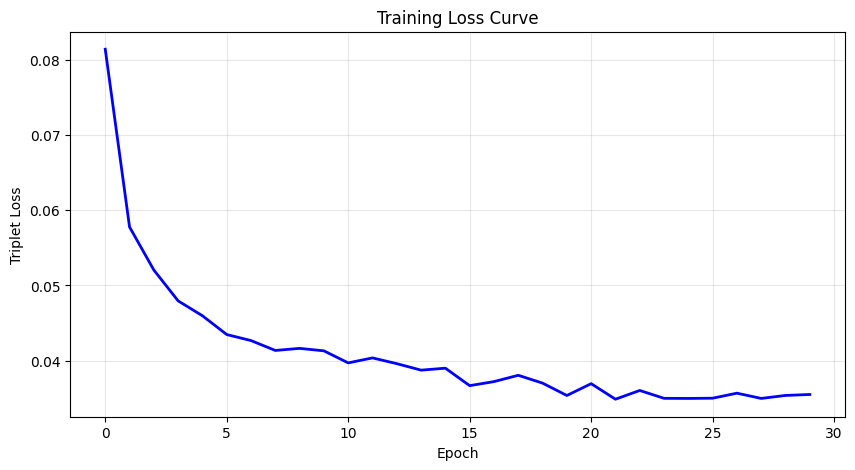


✓ Training done!
Model saved: /kaggle/working/yolo11n-reid-triplet.pt

EVALUATE REID MODEL
Feature dim: 256 -> Embedding dim: 256

Query set:
Extracting 1678 images...


Processing: 100%|██████████| 27/27 [00:17<00:00,  1.54it/s]



Gallery set:
Extracting 11579 images...


Processing: 100%|██████████| 181/181 [01:55<00:00,  1.57it/s]



Computing metrics...

REID METRICS RESULTS
mAP:      17.17%
Rank-1:   38.02%
Rank-5:   60.13%
Rank-10:  70.32%
Rank-20:  80.33%


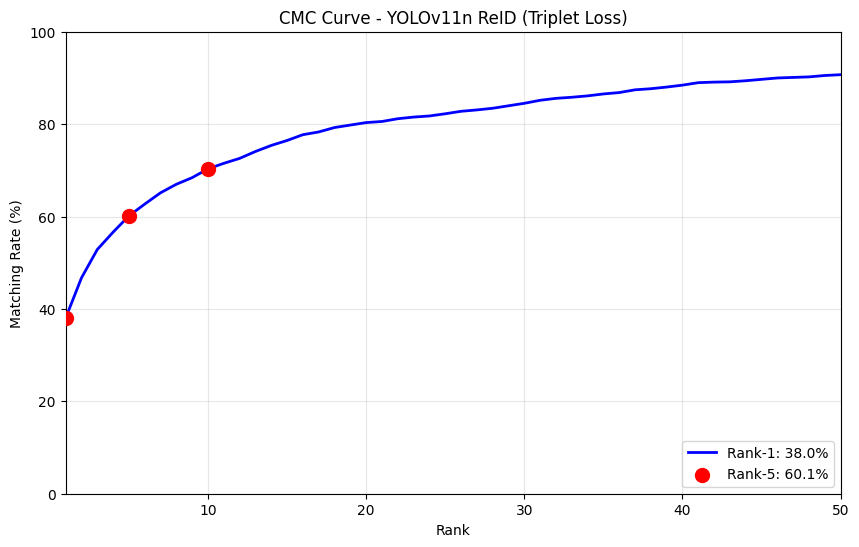


SUMMARY
Model: YOLOv11n-ReID (Triplet Loss)


ValueError: Format specifier missing precision

In [13]:
# Train model
model = train()

# Evaluate model
results = evaluate()

# Summary
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Model: YOLOv11n-ReID (Triplet Loss)")
print(f"Dataset: VeRi ({DATA_FRACTION * 100:. 0f}%)")
print(f"mAP: {results['mAP']:.2f}%")
print(f"Rank-1: {results['Rank-1']:.2f}%")
print(f"Rank-5: {results['Rank-5']:.2f}%")
print(f"Rank-10: {results['Rank-10']:.2f}%")
print("=" * 60)